# Student t distribution as a mixture of Gaussians

Physicists often assume that most distributions are Gaussian. But sometimes they are Student t distributions.

David C. Bailey, in the paper *[Not Normal: the uncertainties of scientific measurements](https://royalsocietypublishing.org/doi/epdf/10.1098/rsos.160600)*, 
analyses 41000 measurements of 3200 quantities from medicine, nuclear and   particle physics, and many interlaboratory comparisons.  He finds "Uncertainty-normalized   differences between  multiple  measurements  of  the  same  quantity  are consistent with heavy-tailed Student’s t-distributions that are often almost Cauchy, far from a Gaussian Normal bell curve".

Appendix A of *Rigorous constraints on three-nucleon forces in chiral effective field theory from fast and accurate calculations of few-body observables* by Wesolowski et al. ([arXiv:2104.0441](https://arxiv.org/abs/2104.04441)) explains why, in linear parameter estimation problems with variance estimation, one finds that the parameters are typically t distributed after one marginalizes over the variance. 

In short, if you are uncertain of your uncertainty (variance), and being a good Bayesian you integrate over the distribution of variances, you will get a t distribution.
So imagine a mixture of normal distributions with a common mean but with the precision (the inverse of the variance) distributed according to a gamma distribution (or the variance is distributed with an inverse gamma distribution).
As a visualization, Rasmus Bååth in this [blog entry](https://www.sumsar.net/blog/2013/12/t-as-a-mixture-of-normals/) created an animation by making draws from a normal distribution whose width (standard deviation) "jumps around".
Here we have created a version of this animation that also includes the sampling of the variance. (Note: this could have alternatively been done with conjugate priors.)

## Preliminaries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.cm as cm
from matplotlib import animation 

import ipywidgets as widgets
from IPython.display import display


from scipy.stats import norm, t, gamma

In [2]:
# set up graphics defaults

from graphs_rjf import setup_rc_params
setup_rc_params(presentation=False, uselatex=False)  # Switch to True for larger fonts
                           # Switch to True for LaTeX but SLOW

mpl.rcParams['figure.constrained_layout.use'] = False


 Here we define some utility functions we can use to explore the t distribution.

In [3]:
def dist_stuff(dist):
    """
    Finds the median, mean, and 68%/95% credible intervals for the given 
    1-d distribution (which is an object from scipy.stats).  
    """
    # For x = median, mean: return x and the value of the pdf at x as a list
    median = [dist.median(), dist.pdf(dist.median())]  
    mean = [dist.mean(), dist.pdf(dist.mean())]
    # The left and right limits of the credibility interval are returned
    cred68 = dist.interval(0.68)
    cred95 = dist.interval(0.95)
    return median, mean, cred68, cred95

def dist_mode(dist, x):
    """
    Return the mode (maximum) of the 1-d distribution for array x.
    """
    x_max_index = dist.pdf(x).argmax()
    # Return x of the maximum and the value of the pdf at that x 
    mode = [x[x_max_index], dist.pdf(x[x_max_index])]
    return mode

def dist_plot(ax, dist_label, x_dist, dist, color='blue'):
    """
    Plot the distribution, indicating median, mean, mode
    and 68%/95% probability intervals on the axis that is passed.
    """
    median, mean, cred68, cred95 = dist_stuff(dist)
    mode = dist_mode(dist, x_dist)
    
    ax.plot(x_dist, dist.pdf(x_dist), label=dist_label, color=color)    
    ax.set_xlabel('x')
    ax.set_ylabel('p(x)')
    
    # Point to the median, mode, and mean with arrows (adjusting the spacing)
    text_x = 0.2*(x_dist[-1] - x_dist[0])
    text_x_mid = (x_dist[-1] + x_dist[0]) / 2.
    text_y = mode[1]*1.15
    ax.annotate('median', xy=median, xytext=(text_x_mid+text_x, text_y),
                arrowprops=dict(facecolor='black', shrink=0.05))
    ax.annotate('mode', xy=mode, xytext=(text_x_mid-text_x, text_y),
                arrowprops=dict(facecolor='red', shrink=0.05))
    ax.annotate('mean', xy=mean, xytext=(text_x_mid, text_y),
                arrowprops=dict(facecolor='blue', shrink=0.05))
    
    # Mark the credible intervals using shading (with appropriate alpha)
    ax.fill_between(x_dist, 0, dist.pdf(x_dist), 
                    where=((x_dist > cred68[0]) & (x_dist < cred68[1])), 
                    facecolor='blue', alpha=0.2)
    ax.fill_between(x_dist, 0, dist.pdf(x_dist), 
                    where=((x_dist > cred95[0]) & (x_dist < cred95[1])), 
                    facecolor='blue', alpha=0.1)
    
    ax.legend();

## Make some plots

Pick some parameters characterizing normal (Gaussian), gamma, and t distributions, and make some plots.

In [4]:
# For normal distribution
mu = 0      # mean
sigma = 3   # standard deviation

# For gamma distribution
a1 = 1
b1 = 1/9

# For t distribution
t_df = 2  # degrees of freedom
t_loc = 0 # mean
t_scale = 3  # standard deviation


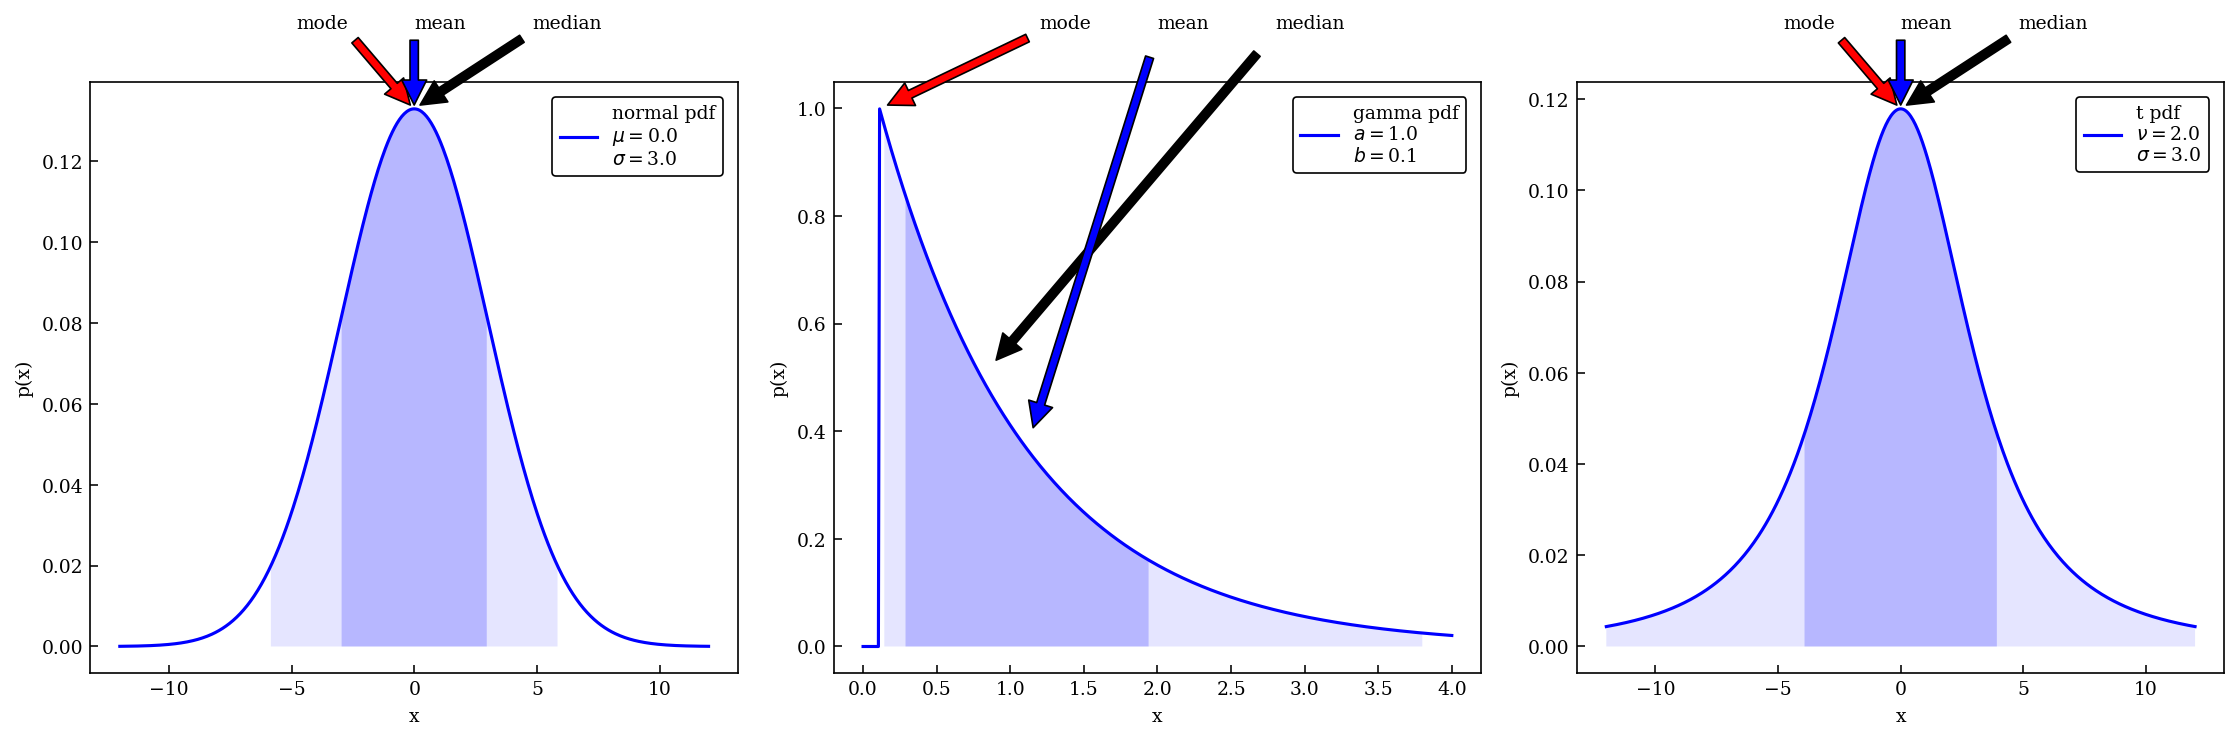

In [5]:
# Make some standard plots: normal, beta
fig = plt.figure(figsize=(15,5))

# Standard normal distribution -- try changing the mean and std. dev. 
x_norm = np.linspace(-12, 12, 500) 
norm_dist = norm(mu, sigma) # the normal distribution from scipy.stats
norm_label='normal pdf' + '\n' + rf'$\mu=${mu:1.1f}' \
             + '\n' + rf'$\sigma=${sigma:1.1f}' 
ax1 = fig.add_subplot(1,3,1)
dist_plot(ax1, norm_label, x_norm, norm_dist)

# gamma distribution, characterized by a and b parameters
x_gamma = np.linspace(0, 4, 500)  # gamma ranges from 0 to infinity 
gamma_dist = gamma(a1, b1)  # the beta distribution from scipy.stats
gamma_label='gamma pdf' + '\n' + rf'$a=${a1:1.1f}' \
              + '\n' + rf'$b=${b1:1.1f}'
ax2 = fig.add_subplot(1,3,2)
dist_plot(ax2, gamma_label, x_gamma, gamma_dist)

# student t distribution
x_t = np.linspace(-12, 12, 500) 
t_dist = t(df=t_df, loc=t_loc, scale=t_scale)
t_label='t pdf' + '\n' + rf'$\nu=${t_df:1.1f}' \
              + '\n' + rf'$\sigma=${t_scale:1.1f}' 
ax3 = fig.add_subplot(1,3,3)
dist_plot(ax3, t_label, x_t, t_dist)

# mu2 = gamma2_dist.mean()
# sigma2 = gamma2_dist.std()
# norm2_dist = norm(mu2, sigma2)
# ax3.plot(x_gamma, norm2_dist.pdf(x_gamma), color='red')

fig.tight_layout()

## Histograms matching a t distribution

We follow the guidance of the blog by Rasumu Baath:
a t distribution with mean $\mu$, scale $s$, and degrees of freedom $\nu$ 

$$
  y \sim \text{t}(\nu, \text{loc}=\mu, \text{scale}=s)
$$

can be created from

$$
  y \sim \text{Normal}(\mu, \sigma)
$$

where $\sigma$ comes from 

$$
  \frac{1}{\sigma^2} \sim \text{Gamma}(a=\nu/2, \text{scale}=1/(s^2 \nu/2))
$$

First get 6000 draws of $1/\sigma^2$.

In [6]:
t_loc = 0
t_scale = 3
t_df = 2  # 20

t_dist = t(df=t_df, loc=t_loc, scale=t_scale)


In [7]:
N_gamma = 6000 #  500000 # 6000
gamma_a = t_df / 2
gamma_scale = 1 / (t_scale**2 * t_df / 2)
sigma_vals = 1 / np.sqrt(gamma.rvs(gamma_a, scale=gamma_scale, size=N_gamma))

In [8]:
norm_loc = t_loc
norm_scaled_vals = np.array([norm.rvs(norm_loc, sigma, size=1) for sigma in sigma_vals]).flatten()

In [9]:
print(norm_scaled_vals)   # debugging check

[-2.34007449  0.94567081 -0.09891225 ... -7.09715575 13.30436942
 -1.69211484]


In [10]:
print(sigma_vals.shape)
print(norm_scaled_vals.shape)

(6000,)
(6000,)


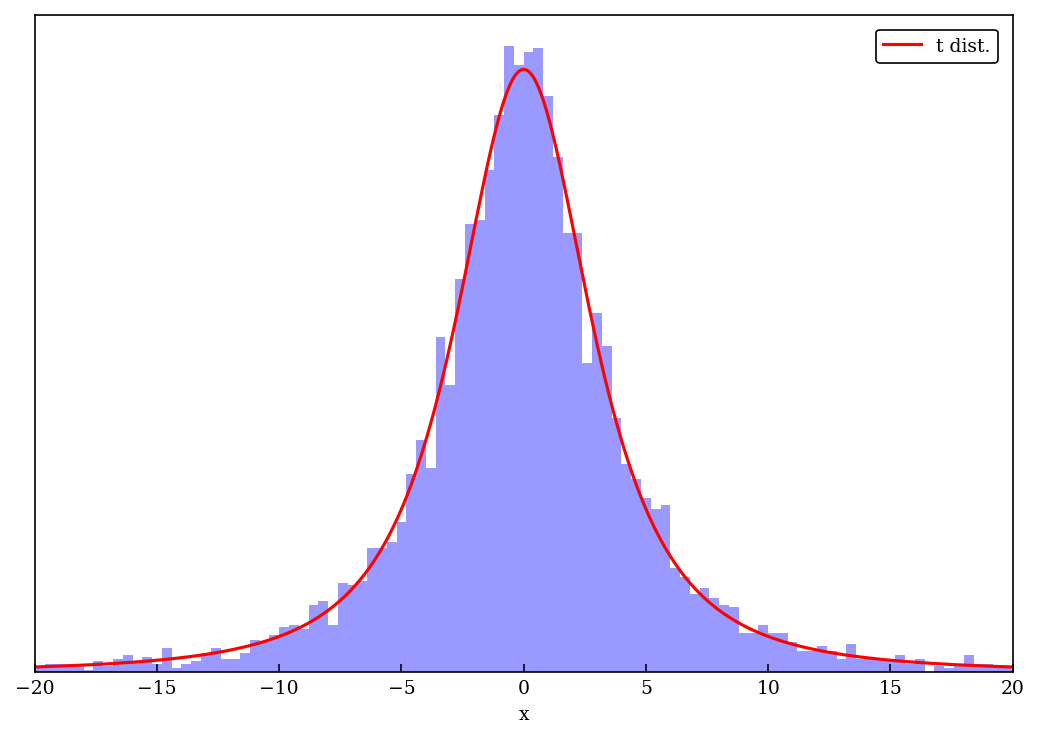

In [11]:
x_t = np.linspace(-20, 20, 500) 

fig = plt.figure(figsize=(7,5))
ax1 = fig.add_subplot(1,1,1)
ax1.set_xlabel('x')
ax1.yaxis.set_visible(False)
ax1.set_xlim(-20, 20)

t_label = 't dist.'
t_color = 'red'
n_color = 'green'

t_dist_pts = t_dist.pdf(x_t)
t_dist_max = max(t_dist_pts)
ax1.plot(x_t, t_dist_pts, label=t_label, color=t_color)    

num_bins = 100
count, bins, ignored = ax1.hist(norm_scaled_vals, range=(-20,20), bins=num_bins, density=True,
                                     color='blue', alpha=0.4)


ax1.legend()    
fig.tight_layout()

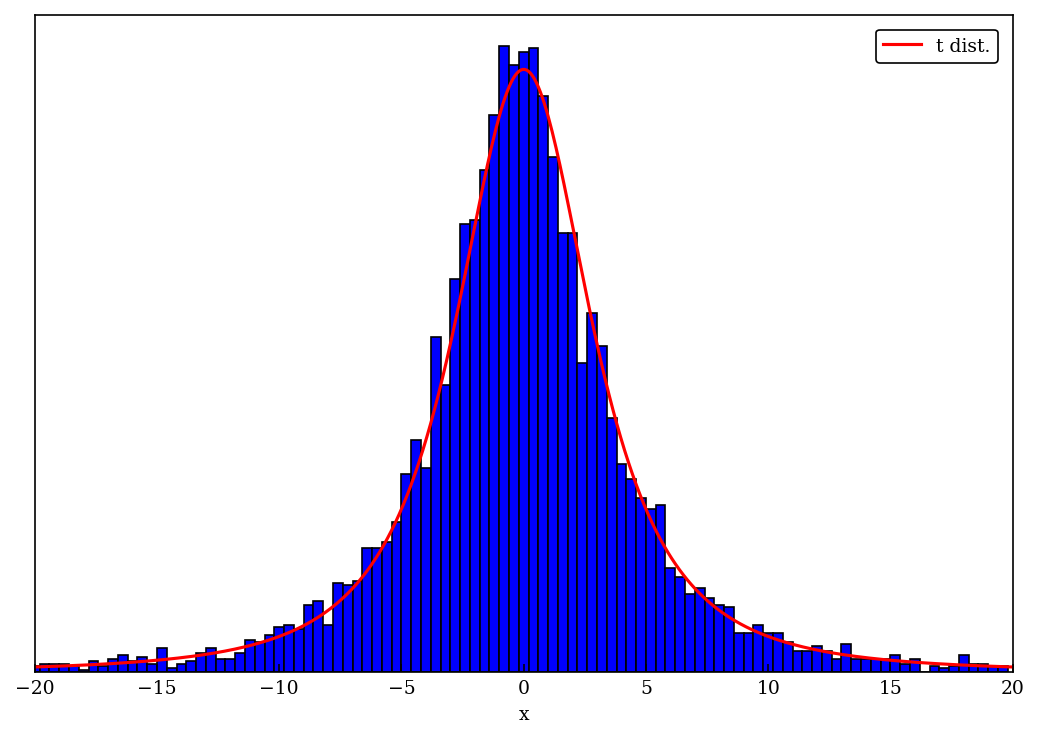

In [12]:
x_max = 20
x_t = np.linspace(-x_max, x_max, 500) 

fig = plt.figure(figsize=(7,5))
ax1 = fig.add_subplot(1,1,1)
ax1.set_xlabel('x')
ax1.yaxis.set_visible(False)
ax1.set_xlim(-x_max, x_max)

t_label = 't dist.'
t_color = 'red'
n_color = 'green'

t_dist_pts = t_dist.pdf(x_t)
t_dist_max = max(t_dist_pts)
ax1.plot(x_t, t_dist_pts / t_dist_max, label=t_label, color=t_color)    

num_bins = 100
delta_bin = 2 * x_max / (num_bins)
hist_pts, bin_edges = np.histogram(norm_scaled_vals, bins=num_bins, range=(-x_max, x_max))
hist_norm = 1 / (np.sum(hist_pts) * delta_bin)  #  1 / max(hist_pts)
ax1.bar(bin_edges[:-1], hist_pts * hist_norm / t_dist_max, align = "center", width = np.diff(bin_edges), color='blue', ec='black')

ax1.legend()    
fig.tight_layout()

## Making a movie of the evolution of the distribution

We'll follow the general idea in the blog by Rasumu Baath, with some tweaks.

We save the animation as an mp4 file.

You can adjust all details of the animation by adjusting the settings below.

In [13]:

def animate(nframe, empty=False):
    """
    Draw a new frame every time with the sampled value and the Gaussian pdf
    
    Many global variables here, so this should be refactored! 
    """
    t_label = 'student t pdf'
    norm_label = 'gaussian pdf'
    samp_label = 'sampled pts'
    num_bins = 50
    
    point_alpha = 0.2
    
    # prepare a clean and image-filling canvas for each frame
    fig = plt.gcf()
    fig.clf()

    ax1 = fig.add_subplot(1,1,1)
    ax1.yaxis.set_visible(False)
    ax1.set_xlim(-20, 20)
    ax1.set_ylim(-0.1, 1.1)
    ax1.set_xlabel(' ')
    ax1.axhline(0., color="gray", alpha=0.5)
    ax1.set_title('Student t distribution as mixture of Gaussians')

    # These are in unitless percentages of the figure size. (0,0 is bottom left)
    max_sigma_vals = max(sigma_vals)
    left, bottom, width, height = [0.15, 0.6, 0.2, 0.2]
    ax2 = fig.add_axes([left, bottom, width, height])
    ax2.set_title(r'$\sigma$ samples')
    sigma_max = 15
    ax2.set_xlim(0, sigma_max)
    ax2.xaxis.set_visible(False)
    ax2.yaxis.set_visible(False)
    ax2.axhline(0., color="gray", alpha=0.5)
    ax2.hist(sigma_vals, bins=num_bins, range=(0,sigma_max), density=True, color=n_color, alpha=0.8)
    ax2.axvline(sigma_vals[nframe], color='red')
    ax2.set_ylim(bottom=-0.02)
    

    if nframe < frame_switch:
        sigma_now = sigma_vals[nframe]    
        norm_pts = norm.pdf(x_t, loc=norm_loc, scale=sigma_now)
        max_norm_pts = max(norm_pts)
        scale = 1 / max_norm_pts  # t_dist_max / max_norm_pts
        
        ax1.plot(x_t, scale * norm_pts, color=n_color, label=norm_label)    
        ax1.plot(norm_scaled_vals[:nframe], np.zeros(nframe), '.', color='blue', alpha=point_alpha, label=samp_label)
        ax1.plot(norm_scaled_vals[nframe], 0, '.', color='red')
    else:
        sigma_now = sigma_vals[nframe]    
        norm_pts = norm.pdf(x_t, loc=norm_loc, scale=sigma_now)
        max_norm_pts = max(norm_pts)
        scale = 1 / max_norm_pts  # t_dist_max / max_norm_pts

        index = int(frame_switch + (nframe - frame_switch) * frame_skip)

        #ax1.plot(norm_scaled_vals[:index], np.zeros(index), '.', color='blue', alpha=point_alpha, label=samp_label)
        
#         count, bins, ignored = ax1.hist(norm_scaled_vals[:index], range=(-20,20), bins=num_bins, density=False,
#                                      color='blue', alpha=0.4)
        hist_pts, bin_edges = np.histogram(norm_scaled_vals[:index], bins=num_bins, range=(-x_max, x_max))
        ax1.bar(bin_edges[:-1], hist_pts * hist_norm / t_dist_max, align = "edge", width = np.diff(bin_edges), 
                color='blue', ec='black', label=samp_label)
        if (nframe < nframes - 2):
            ax1.plot(x_t, scale * norm_pts, color=n_color, label=norm_label)    
            ax1.plot(norm_scaled_vals[nframe], 0, '.', color='red')

    # Plot the expected t distribution at the end of the animation
    if (nframe > nframes - 2):
        ax1.plot(x_t, t_dist.pdf(x_t) / t_dist_max, label=t_label, color=t_color)
      
    ax1.legend(loc='upper right')
    #fig.tight_layout()




max index: 4840
Saving mp4 video:  Student_t_animation_01Jan2024.mp4


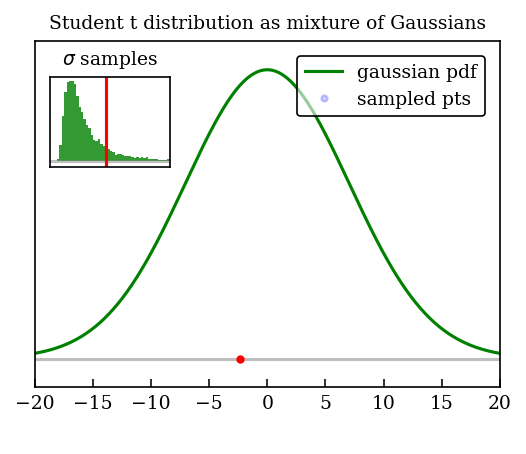

In [16]:
# Settings
from datetime import date
today = date.today()
date_formatted = today.strftime("%d%b%Y")

gif_filename = 'Student_t_animation_' + date_formatted  # filename for gif
width, height = 640, 224  # dimensions of each frame
nframes = 120  #  80  # number of frames
fps = 3  # frames per second
interval = 100

num_bins = 50
delta_bin = 2 * x_max / (num_bins)
frame_switch = 40
frame_skip = N_gamma / 100
index_max = int(frame_switch + (nframes - frame_switch) * frame_skip)
print(f'max index: {index_max}')
hist_pts_all, bin_edges = np.histogram(norm_scaled_vals[:index_max], bins=num_bins, range=(-x_max, x_max))
hist_norm = 1 / (np.sum(hist_pts_all) * delta_bin)  #  1 / max(hist_pts)


fig = plt.figure(figsize=(4,3))
anim = animation.FuncAnimation(fig, animate, frames=nframes, repeat=False)

# Save as an animated gif
# print('Saving animated gif: ', gif_filename + '.gif')
# anim.save(gif_filename + '.gif', writer='imagemagick', fps=fps)

# saving to mp4 using ffmpeg writer
print('Saving mp4 video: ', gif_filename + '.mp4')
writervideo = animation.FFMpegWriter(fps=fps)
anim.save(gif_filename + '.mp4', writer=writervideo)


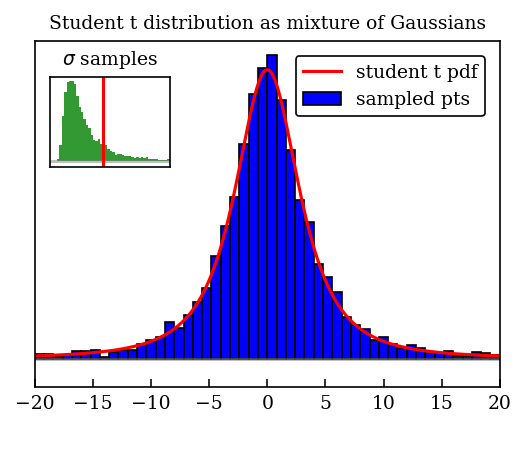

In [15]:
# get a snapshot of the end result
fig = plt.figure(figsize=(4,3))
animate(nframes)  # get the frame at the end